<a href="https://colab.research.google.com/github/TanayShukla/Fashion-Recommendation-System-using-Image-Features/blob/main/Fashion_Recommendation_System_using_Image_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import os

# Ensure correct paths for Google Colab
zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

# Create extraction directory if it doesn't exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Extract files
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List extracted files directly without storing in a variable
print(os.listdir(extraction_directory)[:10])


['__MACOSX', 'women fashion']


In [2]:
# Correcting the path to include the 'women fashion' directory
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# Initialize a counter for the number of files
file_count = 0

# List the files in the updated directory using os.scandir()
with os.scandir(extraction_directory_updated) as entries:
    # Iterate over the entries in the directory
    for entry in entries:
        # Print the name of the file
        print(entry.name)
        # Increment the file count
        file_count += 1
        # Break the loop after printing the first 10 files
        if file_count == 10:
            break

# Print the total number of files in the directory
print("Total number of files:", file_count)


red dress adorned with an intricate white pattern.jpg
black top, white trousers.jpg
cream-colored, long, open-front coat with wide lapels.jpg
fitted black dress that reaches down to mid-calf.jpg
royal blue off-shoulder dress.jpg
black dress with sparkling details.jpg
chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg
dark blue, knee-length dress with thin straps.jpg
red dress with a pattern of small white flowers.jpg
Latest-Party-Wear-One-Piece-Gown-For-Women.webp
Total number of files: 10


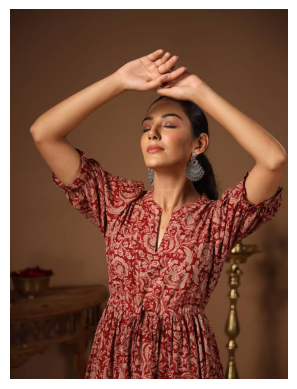

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Function to display an image
def display_image(file_path):
    try:
        # Open the image file using a context manager
        with Image.open(file_path) as image:
            # Display the image directly without storing it
            plt.imshow(image)
            plt.axis('off')
            plt.show()
    except FileNotFoundError:
        print("File not found:", file_path)
    except Exception as e:
        print("An error occurred:", str(e))

# Directory containing the images
extraction_directory_updated = '/content/women_fashion/women fashion'

# List of extracted image files
extracted_files_updated = os.listdir(extraction_directory_updated)

# Display the first image
if extracted_files_updated:
    first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
    display_image(first_image_path)
else:
    print("No images found in the directory:", extraction_directory_updated)


In [7]:
import glob

# Directory path containing your images
image_directory = '/content/women_fashion/women fashion'

# Define the image file extensions to filter
image_extensions = ('.jpg', '.png', '.jpeg', '.webp')

# Use glob to retrieve image file paths with specified extensions
image_paths_list = glob.glob(os.path.join(image_directory, '*.*'), recursive=True)

# Filter image file paths based on specified extensions
image_paths_list = [file for file in image_paths_list if file.lower().endswith(image_extensions)]

# Print the list of image file paths
print(image_paths_list)


['/content/women_fashion/women fashion/red dress adorned with an intricate white pattern.jpg', '/content/women_fashion/women fashion/black top, white trousers.jpg', '/content/women_fashion/women fashion/cream-colored, long, open-front coat with wide lapels.jpg', '/content/women_fashion/women fashion/fitted black dress that reaches down to mid-calf.jpg', '/content/women_fashion/women fashion/royal blue off-shoulder dress.jpg', '/content/women_fashion/women fashion/black dress with sparkling details.jpg', '/content/women_fashion/women fashion/chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg', '/content/women_fashion/women fashion/dark blue, knee-length dress with thin straps.jpg', '/content/women_fashion/women fashion/red dress with a pattern of small white flowers.jpg', '/content/women_fashion/women fashion/Latest-Party-Wear-One-Piece-Gown-For-Women.webp', '/content/women_fashion/women fashion/mustard yellow fitt

In [14]:
import os
import numpy as np
from PIL import UnidentifiedImageError
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Define the directory containing the images
image_directory = '/content/women_fashion/women fashion'

# Obtain a list of file paths for the images with valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')  # Add more extensions if needed
image_paths_list = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.lower().endswith(valid_extensions)]

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Define the preprocess_image function
def preprocess_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)
        return preprocess_input(img_array_expanded)
    except UnidentifiedImageError:
        print("Skipping file:", img_path, "- Not a recognized image file")
        return None

# Define the extract_features function
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Initialize lists to store features and image names
all_features = []
all_image_names = []

# Iterate through the image paths and extract features
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    if preprocessed_img is not None:
        features = extract_features(model, preprocessed_img)
        all_features.append(features)
        all_image_names.append(os.path.basename(img_path))


1/1 [==============================] - 0s 20ms/step


In [20]:
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_paths, model, top_n=5, batch_size=32):
    """Recommend fashion items based on an input image."""
    # Check if input image path exists and is a valid file
    if not os.path.exists(input_image_path) or not os.path.isfile(input_image_path):
        print("Error: Invalid input image path.")
        return

    # Preprocess the input image
    input_image = batch_preprocess_images([input_image_path])

    # Extract features for the input image
    input_features = model.predict(input_image)
    input_features = np.reshape(input_features, (1, -1))  # Flatten the features

    # Calculate cosine similarities between input image features and all features
    similarities = np.dot(all_features, input_features.T) / (np.linalg.norm(all_features, axis=1) * np.linalg.norm(input_features))
    similar_indices = np.argsort(similarities[:, 0])[:-top_n-1:-1]

    # Display input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display top similar images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = all_image_paths[idx]
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 64ms/step


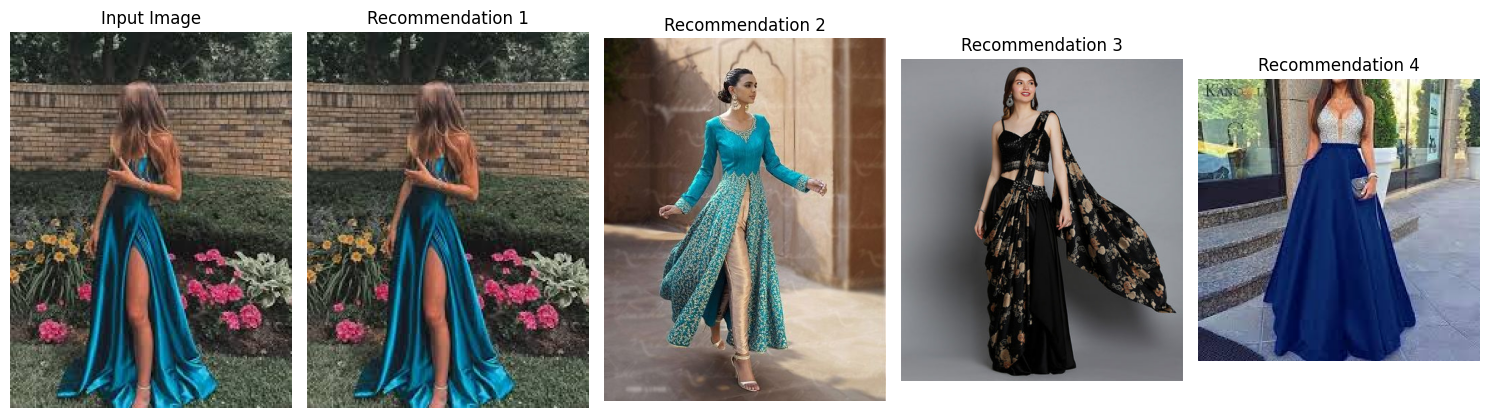

In [40]:
input_image_path = '/content/women_fashion/women fashion/long, elegant, teal dress with a high slit on one side.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)